In [ ]:
import yfinance as yf
import pandas as pd

# Download data
data = yf.download('INDHOTEL.NS', period='1y')
data.to_csv(r"C:\Users\ACER\AppData\Local\Programs\Python\Python313\python lectures\INDHOTELS.csv")
data


In [216]:
import pandas as pd
stockdata = pd.read_csv(r"C:\Users\ACER\AppData\Local\Programs\Python\Python313\python lectures\INDHOTEL.csv",                
    parse_dates=["Date"],
    dayfirst=True,                  
    index_col="Date"                
)


print(stockdata.index.dtype)       
print(stockdata.head())            



datetime64[ns]
                 Close        High         Low        Open   Volume
Date                                                               
2024-08-01  630.296570  640.466615  628.800968  640.167507  1504378
2024-08-02  626.956360  634.035579  621.223219  626.059035  1814825
2024-08-05  607.413879  622.669009  598.240841  609.408016  5384751
2024-08-06  595.199768  617.234947  593.255473  608.361078  2833495
2024-08-07  618.780396  621.921184  598.639670  603.226159  2716217


Data Import Summary

- Loaded `INDHOTEL.csv` with stock data  
- Parsed `Date` column as `datetime64[ns]` and set as index  
- Verified structure using `.head()` — ready for time-series analysis


In [217]:
print(stockdata.loc["2025-07",["Open","Close","High","Low"]].head())



                  Open       Close        High         Low
Date                                                      
2025-07-01  759.000000  762.049988  764.400024  752.000000
2025-07-02  756.900024  756.000000  765.650024  752.400024
2025-07-03  755.049988  748.250000  757.400024  745.250000
2025-07-04  748.250000  747.549988  753.000000  742.049988
2025-07-07  747.549988  737.150024  748.700012  735.549988


In [218]:
# Step 1: Monthly close prices
monthly_close = stockdata['Close'].resample('M').last()

stockdata['Daily Return'] = stockdata['Close'].pct_change()
monthly_return = monthly_close.pct_change()
daily_return=stockdata['Close'].pct_change()

# Create a new DataFrame for monthly analysis
monthly_df = pd.DataFrame({
    'Monthly Close': monthly_close,
    'Monthly Return': monthly_return
})

print(monthly_df.head())


            Monthly Close  Monthly Return
Date                                     
2024-08-31     645.601562             NaN
2024-09-30     682.692505        0.057452
2024-10-31     674.715942       -0.011684
2024-11-30     791.023926        0.172381
2024-12-31     874.977051        0.106132


C:\Users\ACER\AppData\Local\Temp\ipykernel_23244\616359492.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_close = stockdata['Close'].resample('M').last()


Monthly Return Calculation

- tep 1: Extracted monthly closing prices using `.resample('M').last()`
- Step 2: Calculated:
  -Daily Return: `pct_change()` on daily close
  -Monthly Return: `pct_change()` on monthly close
- Step 3: Created `monthly_df` with:
  - `Monthly Close`
  - `Monthly Return`

This sets up a clean base for analyzing monthly performance trends.


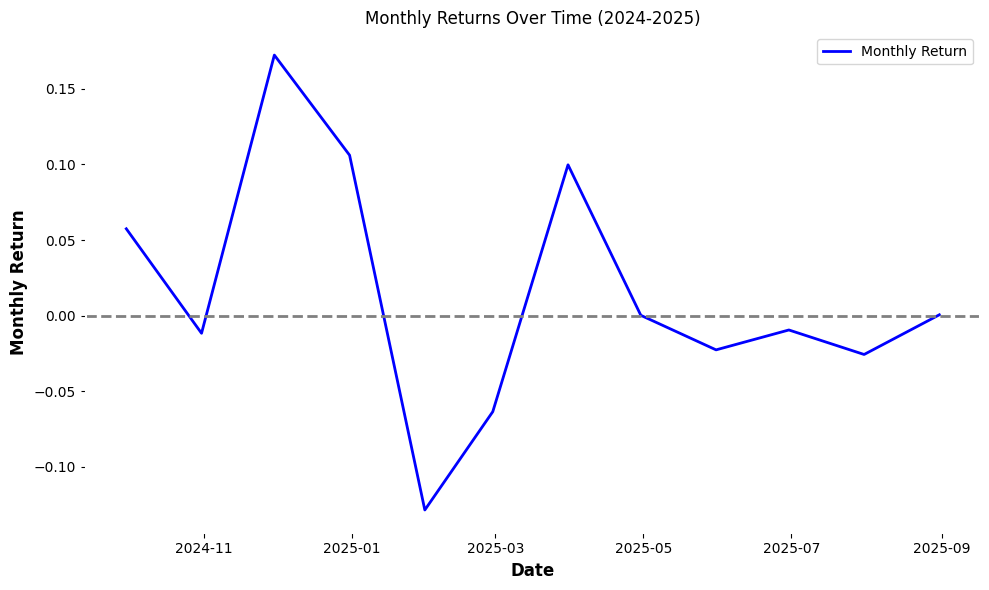

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

returns = monthly_df['Monthly Return'].dropna()

returns = returns.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=returns, x="Date", y='Monthly Return', label="Monthly Return", color="blue")
plt.axhline(0, color='gray', linestyle='--')  # Reference line
plt.title("Monthly Returns Over Time (2024-2025)")
plt.xlabel("Date")
plt.ylabel("Monthly Return")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()



Monthly Returns (Nov 2024 – Sep 2025)

This line chart tracks monthly returns over time:

- Peaks: Positive returns near **+15%**
- Troughs: Negative dips close to **–10%*
- Reference Line: Dashed gray line at 0% marks breakeven

The chart highlights volatility and cyclical performance, helping assess momentum and risk across months.

Interpretation

Monthly returns show high volatility, with sharp gains and occasional dips.  
Positive months dominate, hinting at an overall upward trend.  
Timing entries during dips could enhance long-term returns.


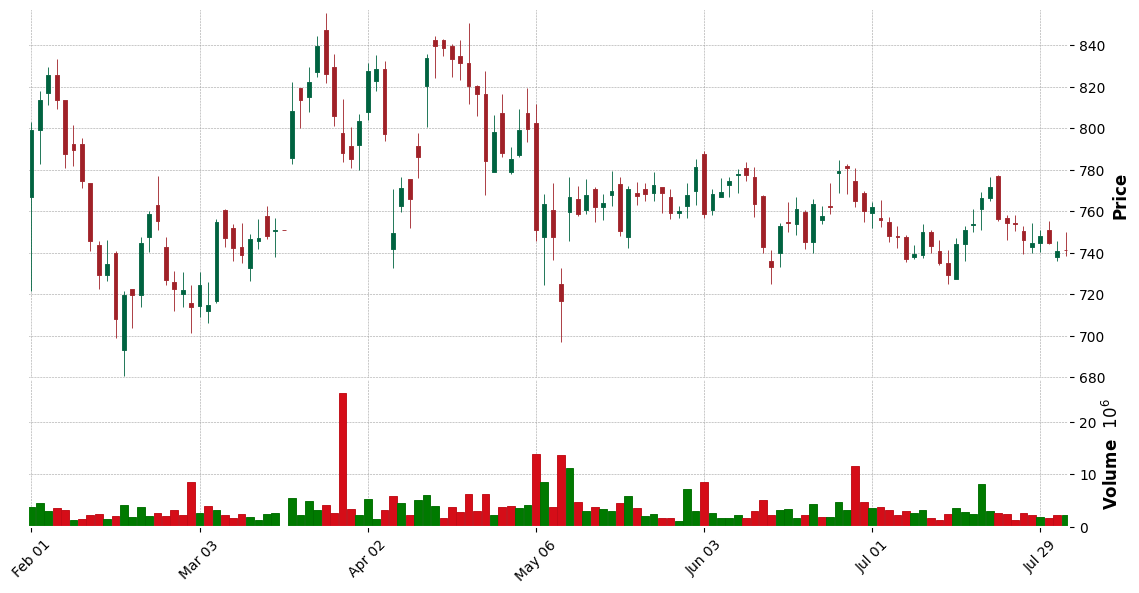

In [220]:
import mplfinance as mpf
import pandas as pd
mpf.plot(stockdata.loc["2025-02-01":"2025-08-01"],
          type='candle', 
          style='charles', volume=True,
             tight_layout=True,
        
         
          figsize=(12,6))

### Candlestick Chart: Feb–Aug 2025

This chart visualizes stock price movements and trading volume from Feb 1 to Aug 1, 2025:

- **Candlesticks**:  
  - Green = Price increase  
  -  Red = Price decrease  
- **Price Range**: ₹660 to ₹840  
- **Volume Bars**:  
  - Green = Higher volume on up days  
  - Red = Higher volume on down days  

Useful for spotting trends, volatility, and volume spikes during key price movements.


In [224]:
stockdata['MA_30'] = stockdata['Close'].rolling(window=30).mean()
stockdata['MA_60'] = stockdata['Close'].rolling(window=60).mean()
stockdata['MA_90'] = stockdata['Close'].rolling(window=90).mean()

MA_60: Approximates a short-term trend using a 60-day window
MA_60 and MA_90: Capture medium- and long-term trends using a 90-day window
These indicators help identify trend direction, momentum shifts, and potential entry/exit signals


<Axes: xlabel='Date', ylabel='Close Prices'>

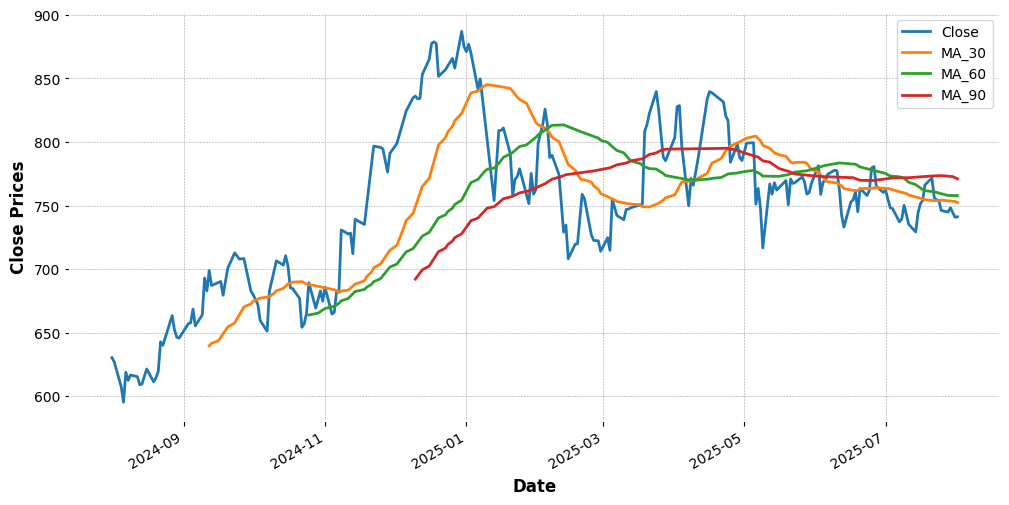

In [225]:
stockdata[['Close', 'MA_30', 'MA_60','MA_90']].plot(figsize=(12,6),ylabel="Close Prices" )


 When the blue line is above all MAs, it signals strong upward momentum.
 When the blue line crosses below MA_30 or MA_60, it may indicate weakening trend.
 The spread between MAs shows how fast the trend is changing — wider spread = stronger momentum.


<Axes: title={'center': '9-Month Rolling Volatility (Monthly Returns)'}, xlabel='Date'>

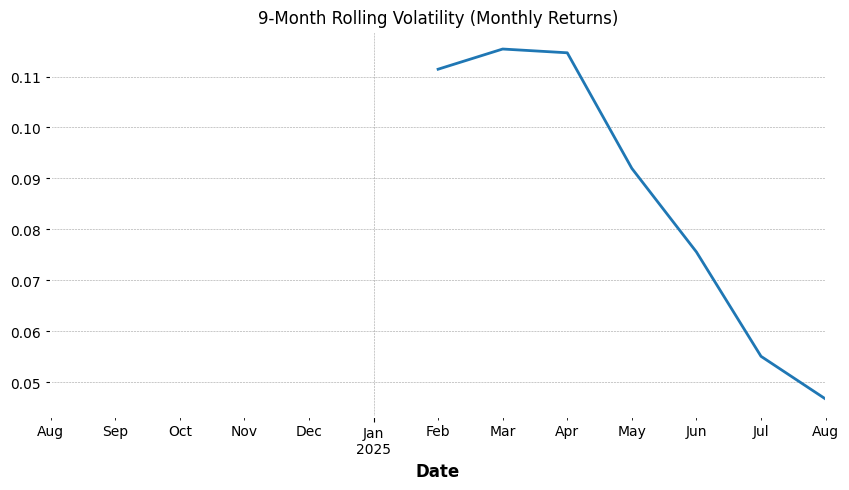

In [226]:
monthly_df['Rolling Volatility'] = monthly_df['Monthly Return'].rolling(window=6).std()
monthly_df['Rolling Volatility'].plot(figsize=(10, 5), title="9-Month Rolling Volatility (Monthly Returns)")


<Axes: title={'center': '90-Day Rolling Volatility'}, xlabel='Date'>

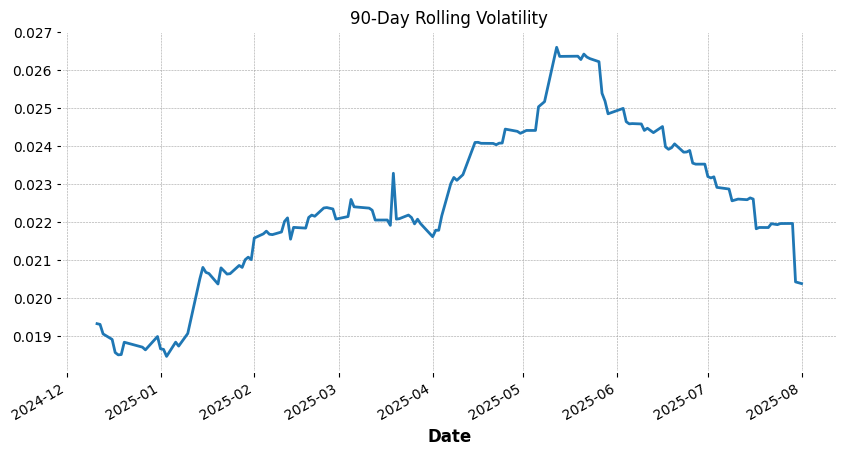

In [227]:
stockdata['Volatility'] = stockdata['Daily Return'].rolling(window=90).std()
stockdata['Volatility'].plot(figsize=(10, 5), title="90-Day Rolling Volatility")


Rising volatility (Jan–May): Market uncertainty or increased trading activity.
Declining volatility (June–Aug): Stabilization, possibly post-event or correction.
Sharp drop in August: Could signal reduced speculation or investor confidence returning.


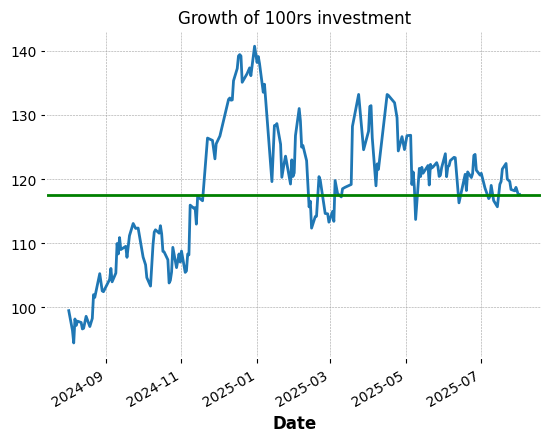

In [228]:
stockdata['Cumulative Return'] = (1 + stockdata['Daily Return']).cumprod()
stockdata['Cumulative Return'] *= 100
final_value = stockdata['Cumulative Return'].iloc[-1]
stockdata['Cumulative Return'].plot(title='Growth of 100rs investment')
plt.axhline(final_value, color='green', linestyle='-')
plt.show()



In [229]:
print(final_value)

117.58750720080474


### 100rs Investment Growth (Cumulative Return)

If ₹100 had been invested at the start of the period, it would have grown to ₹{final_value:.2f}** by the end.


All time High

In [230]:
print(stockdata.High.max())

892.2762333


All Time low

In [231]:
print(stockdata.Low.min())

593.2554733
